## OVERVIEW OF OSEMiN

<img src='https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/OSEMN.png' width=800>

<center><a href="https://www.kdnuggets.com/2018/02/data-science-command-line-book-exploring-data.html"> 
    </a></center>


> <font size=2em>The Data Science Process we'll be using during this section--OSEMiN (pronounced "OH-sum", rhymes with "possum").  This is the most straightforward of the Data Science Processes discussed so far.  **Note that during this process, just like the others, the stages often blur together.***  It is completely acceptable (and ***often a best practice!) to float back and forth** between stages as you learn new things about your problem, dataset, requirements, etc.  
It's quite common to get to the modeling step and realize that you need to scrub your data a bit more or engineer a different feature and jump back to the "Scrub" stage, or go all the way back to the "Obtain" stage when you realize your current data isn't sufficient to solve this problem. 
As with any of these frameworks, *OSEMiN is meant to be treated as guidelines, not law. 
</font>


### OSEMN DETAILS

**OBTAIN**

- This step involves understanding stakeholder requirements, gathering information on the problem, and finally sourcing data that we think will be necessary for solving this problem. 

**SCRUB**

- During this stage, we'll focus on preprocessing our data.  Important steps such as identifying and removing null values, dealing with outliers, normalizing data, and feature engineering/feature selection are handled around this stage.  The line with this stage really blurs with the _Explore_ stage, as it is common to only realize that certain columns require cleaning or preprocessing as a result of the visualzations and explorations done during Step 3.  

- Note that although technically, categorical data should be one-hot encoded during this step, in practice, it's usually done after data exploration.  This is because it is much less time-consuming to visualize and explore a few columns containing categorical data than it is to explore many different dummy columns that have been one-hot encoded. 

**EXPLORE**

- This step focuses on getting to know the dataset you're working with. As mentioned above, this step tends to blend with the _Scrub_ step mentioned above.  During this step, you'll create visualizations to really get a feel for your dataset.  You'll focus on things such as understanding the distribution of different columns, checking for multicollinearity, and other tasks liek that.  If your project is a classification task, you may check the balance of the different classes in your dataset.  If your problem is a regression task, you may check that the dataset meets the assumptions necessary for a regression task.  

- At the end of this step, you should have a dataset ready for modeling that you've thoroughly explored and are extremely familiar with.  

**MODEL**

- This step, as with the last two frameworks, is also pretty self-explanatory. It consists of building and tuning models using all the tools you have in your data science toolbox.  In practice, this often means defining a threshold for success, selecting machine learning algorithms to test on the project, and tuning the ones that show promise to try and increase your results.  As with the other stages, it is both common and accepted to realize something, jump back to a previous stage like _Scrub_ or _Explore_, and make some changes to see how it affects the model.  

**iNTERPRET**

- During this step, you'll interpret the results of your model(s), and communicate results to stakeholders.  As with the other frameworks, communication is incredibily important! During this stage, you may come to realize that further investigation is needed, or more data.  That's totally fine--figure out what's needed, go get it, and start the process over! If your results are satisfactory to all stakeholders involved, you may also go from this stage right into productionizing your model and automating processes necessary to support it.  





## PROCESS CHECKLIST


> Keep in mind that it is normal to jump between the OSEMN phases and some of them will blend together, like SCRUB and EXPLORE.

1. **[OBTAIN](#OBTAIN)**
    - Import data, inspect, check for datatypes to convert and null values
    - Display header and info.
    - Drop any unneeded columns, if known (`df.drop(['col1','col2'],axis=1,inplace=True`)
    <br><br>


2. **[SCRUB](#SCRUB)**
    - Recast data types, identify outliers, check for multicollinearity, normalize data**
    - Check and cast data types
        - [ ] Check for #'s that are store as objects (`df.info()`,`df.describe()`)
            - when converting to #'s, look for odd values (like many 0's), or strings that can't be converted.
            - Decide how to deal weird/null values (`df.unique()`, `df.isna().sum()`)
            - `df.fillna(subset=['col_with_nulls'],'fill_value')`, `df.replace()`
        - [ ] Check for categorical variables stored as integers.
            - May be easier to tell when you make a scatter plotm or `pd.plotting.scatter_matrix()`
            
    - [ ] Check for missing values  (df.isna().sum())
        - Can drop rows or colums
        - For missing numeric data with median or bin/convert to categorical
        - For missing categorical data: make NaN own category OR replace with most common category
    - [ ] Check for multicollinearity
        - Use seaborn to make correlation matrix plot 
        - Good rule of thumb is anything over 0.75 corr is high, remove the variable that has the most correl with the largest # of variables
    - [ ] Normalize data (may want to do after some exploring)
        - Most popular is Z-scoring (but won't fix skew) 
        - Can log-transform to fix skewed data
    
    
3. **[EXPLORE](#EXPLORE)**
    - [ ] Check distributions, outliers, etc**
    - [ ] Check scales, ranges (df.describe())
    - [ ] Check histograms to get an idea of distributions (df.hist()) and data transformations to perform.
        - Can also do kernel density estimates
    - [ ] Use scatter plots to check for linearity and possible categorical variables (`df.plot("x","y")`)
        - categoricals will look like vertical lines
    - [ ] Use `pd.plotting.scatter_matrix(df)` to visualize possible relationships
    - [ ] Check for linearity.
   
   
4. **[MODEL](#MODEL)**

    - **Fit an initial model:** 
        - Run an initial model and get results

    - **Holdout validation / Train/test split**
        - use sklearn `train_test_split`
    
    
5. **[iNTERPRET](#iNTERPRET)**
    - **Assessing the model:**
        - Assess parameters (slope,intercept)
        - Check if the model explains the variation in the data (RMSE, F, R_square)
        - *Are the coeffs, slopes, intercepts in appropriate units?*
        - *Whats the impact of collinearity? Can we ignore?*
        <br><br>
    - **Revise the fitted model**
        - Multicollinearity is big issue for lin regression and cannot fully remove it
        - Use the predictive ability of model to test it (like R2 and RMSE)
        - Check for missed non-linearity
        
       
6. **Interpret final model and draw >=3 conclusions and recommendations from dataset**

<div style="display:block;border-bottom:solid red 3px;padding:1.4em;color:red;font-size:30pt;display:inline-block;line-height:1.5em;">
DELETE THIS CELL AND EVERYTHING ABOVE FROM YOUR FINAL NOTEBOOK
</div>

# Final Project Submission

Please fill out:
* Student name: Justin Hue
* Student pace: self paced / part time / full time: FT
* Scheduled project review date/time: 
* Instructor name: Yish Lim
* Blog post URL:
* Video of 5-min Non-Technical Presentation:

## TABLE OF CONTENTS 

*Click to jump to matching Markdown Header.*<br><br>
 
- **[Introduction](#INTRODUCTION)<br>**
- **[OBTAIN](#OBTAIN)**<br>
- **[SCRUB](#SCRUB)**<br>
- **[EXPLORE](#EXPLORE)**<br>
- **[MODEL](#MODEL)**<br>
- **[iNTERPRET](#iNTERPRET)**<br>
- **[Conclusions/Recommendations](#CONCLUSIONS-&-RECOMMENDATIONS)<br>**
___

# INTRODUCTION

> Explain the point of your project and what question you are trying to answer with your modeling.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***



# OBTAIN

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***


In [91]:
#importing standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')
%matplotlib inline
from statsmodels.formula.api import ols

# SCRUB

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [92]:
#importing data, dropping duplicates, dropping unnecessary columns, filling null values
df1 = pd.read_csv('data/kc_house_data.csv', header=0, encoding='latin-1')
df1 = df1.drop_duplicates()
df1.drop(['date','view','sqft_above', 'sqft_basement', 'yr_renovated', 
'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],axis=1,inplace=True)
df1 = df1.fillna(0)

# EXPLORE

In [93]:
#sorted values by prices (high to low)
x_var = df1.drop('price', axis=1)
x_var

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,3,1.00,1180,5650,1.0,0.0,3,7,1955
1,6414100192,3,2.25,2570,7242,2.0,0.0,3,7,1951
2,5631500400,2,1.00,770,10000,1.0,0.0,3,6,1933
3,2487200875,4,3.00,1960,5000,1.0,0.0,5,7,1965
4,1954400510,3,2.00,1680,8080,1.0,0.0,3,8,1987
...,...,...,...,...,...,...,...,...,...,...
21592,263000018,3,2.50,1530,1131,3.0,0.0,3,8,2009
21593,6600060120,4,2.50,2310,5813,2.0,0.0,3,8,2014
21594,1523300141,2,0.75,1020,1350,2.0,0.0,3,7,2009
21595,291310100,3,2.50,1600,2388,2.0,0.0,3,8,2004


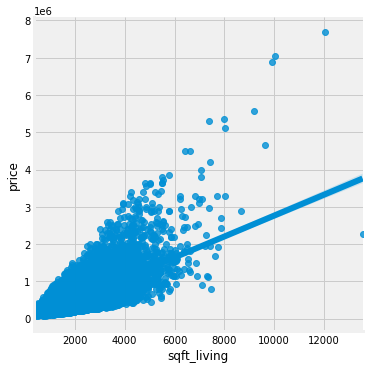

In [94]:
#plotting house sq footage against prices
sns.lmplot(data=df1, x='sqft_living',y='price');

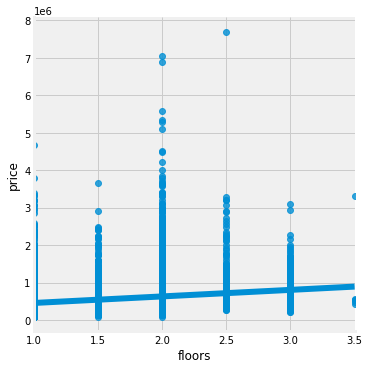

In [95]:
sns.lmplot(data=df1, x='floors',y='price');

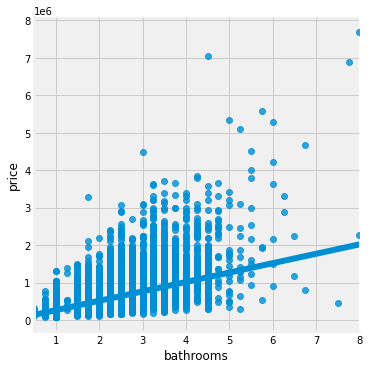

In [96]:
#plotting bathroom numbers against prices
sns.lmplot(data=df1, y='price', x='bathrooms');

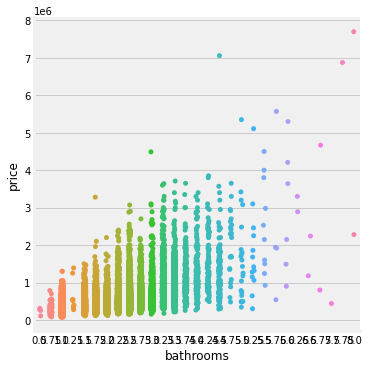

In [97]:
sns.catplot(data=df1, y='price', x='bathrooms');

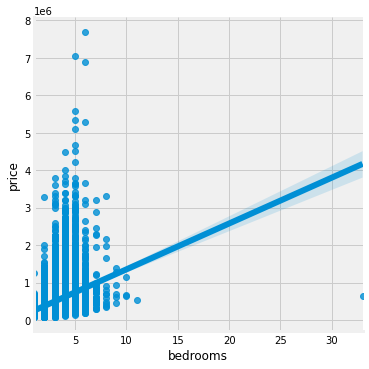

In [98]:
#plotting bedroom numbers against prices
sns.lmplot(data=df1, y='price', x='bedrooms');

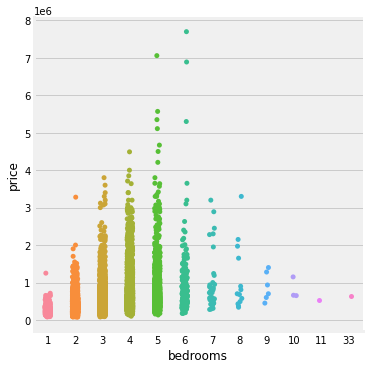

In [99]:
pricexroom = sns.catplot(data=df1, y='price', x='bedrooms');

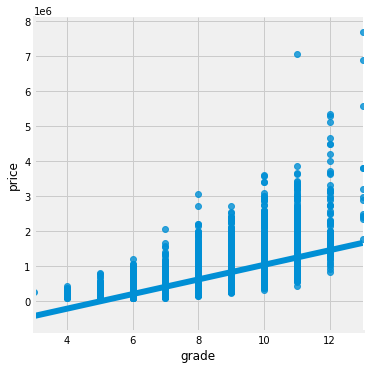

In [100]:
sns.lmplot(data=df1, y='price', x='grade');

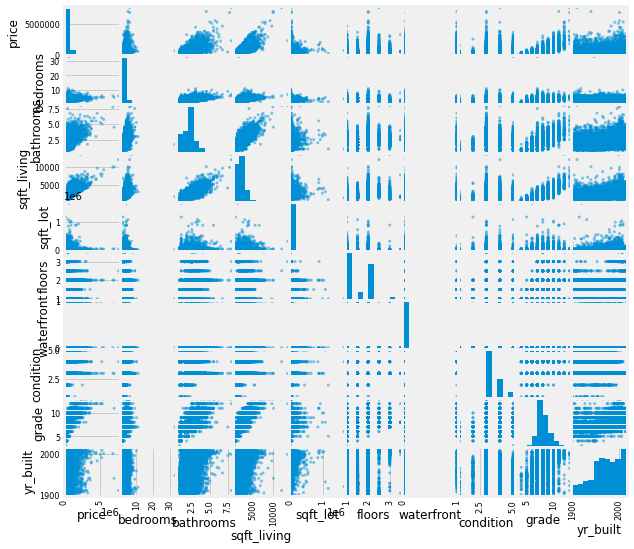

In [101]:
df1_pred = df1.iloc[:,1:11]
pd.plotting.scatter_matrix(df1_pred,figsize  = [9, 9]);
plt.show()

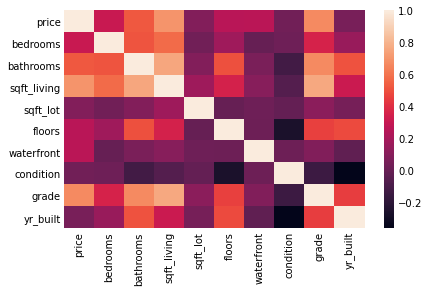

In [102]:
sns.heatmap(df1_pred.corr());

In [103]:
df1_pred.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.036056,0.667951,0.053953
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.026496,0.356563,0.155670
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,-0.126479,0.665838,0.507173
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,-0.059445,0.762779,0.318152
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,-0.008830,0.114731,0.052946
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,-0.264075,0.458794,0.489193
waterfront,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.016648,0.082818,-0.024487
condition,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,1.000000,-0.146896,-0.361592
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.082818,-0.146896,1.000000,0.447865
yr_built,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,-0.024487,-0.361592,0.447865,1.000000


In [104]:
X = df1.drop(columns='price')
Y = df1['price']

model = LinearRegression()

model.fit(X, Y)

r_sq = model.score(X, Y)
print('coefficient of determination:', r_sq)

y_pred = model.predict(X)
print('predicted response:', y_pred, sep='\n')

coefficient of determination: 0.6457750806828823
predicted response:
[291372.56113749 638084.82941886 216803.99373366 ... 115661.93290603
 415641.5685437  119576.03162596]


# MODEL

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [105]:
X = x_var
Y = df1['price']

In [106]:
X.shape, Y.shape

((21597, 10), (21597,))

In [107]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [108]:
X_train.shape, Y_train.shape

((17277, 10), (17277,))

In [109]:
X_test.shape, Y_test.shape

((4320, 10), (4320,))

In [110]:
model = linear_model.LinearRegression()

In [111]:
model.fit(X_train, Y_train)

LinearRegression()

In [112]:
Y_pred = model.predict(X_test)
Y_pred

array([287990.07991699, 872890.41460506, 259438.41353365, ...,
       719576.8263649 , 937400.86501466, 336268.94664075])

In [113]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
     % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred))

Coefficients: [-1.58568229e-06 -4.18893882e+04  4.76408361e+04  1.79860669e+02
 -2.49694789e-01  2.21044983e+04  7.36374246e+05  1.87292764e+04
  1.31576757e+05 -3.85999427e+03]
Intercept: 6716458.155323681
Mean squared error (MSE): 42663223574.68
Coefficient of determination (R^2): 0.66


C:\Users\justi\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

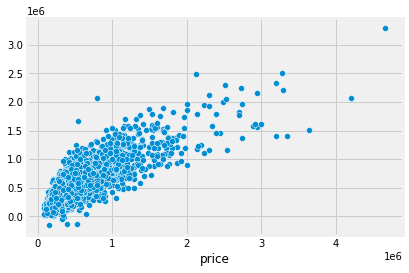

In [114]:
sns.scatterplot(Y_test, Y_pred)

In [115]:
data = df1
X = data.drop(columns='price')
y = data['price']

In [116]:
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print("Train R2: ", linreg.score(X_train, y_train))
print("Test R2: ", linreg.score(X_test, y_test))

print("Train RMSE: ", train_mse**0.5)
print("Test RMSE: ", test_mse**0.5)

Train R2:  0.6464530245272697
Test R2:  0.6411461914469752
Train RMSE:  221547.7225921787
Test RMSE:  207010.60612017146


In [119]:
def model(X_train, X_test, y_train, y_test):
    
    # statsmodels
    features = X_train.copy()
    features['mpg'] = y_train
    
    formula = 'mpg~' + '+'.join(X_train.columns)
    model = ols(formula=formula, data=features).fit()
    
    #sklearn
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)

    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)

    print("Train R2: ", linreg.score(X_train, y_train))
    print("Test R2: ", linreg.score(X_test, y_test))

    print("Train RMSE: ", train_mse**0.5)
    print("Test RMSE: ", test_mse**0.5)
    
    return model.summary()

In [120]:
model(X_train, X_test, y_train, y_test)

Train R2:  0.6464530245272697
Test R2:  0.6411461914469752
Train RMSE:  221547.7225921787
Test RMSE:  207010.60612017146


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     3157.
Date:                Sun, 25 Jul 2021   Prob (F-statistic):               0.00
Time:                        18:19:40   Log-Likelihood:            -2.3717e+05
No. Observations:               17277   AIC:                         4.744e+05
Df Residuals:                   17266   BIC:                         4.744e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6.677e+06   1.47e+05     45.302      0.000    6.39e+06    6.97e+06
id            -1.3e-06   5.92e-07     -2.194      0.028   -2.46e-06   -1.38e-07
bedrooms    -4.278e+04   2288.704    -18.692      0.000   -4.73e+04   -3.83e+04
bathrooms    4.988e+04   3924.019     12.712      0.000    4.22e+04    5.76e+04
sqft_living   179.7896      3.736     48.120      0.000     172.466     187.113
sqft_lot       -0.2411      0.041     -5.848      0.000      -0.322      -0.160
floors       1.915e+04   3911.868      4.896      0.000    1.15e+04    2.68e+04
waterfront   8.138e+05   2.05e+04     39.760      0.000    7.74e+05    8.54e+05
condition     2.02e+04   2825.254      7.148      0.000    1.47e+04    2.57e+04
grade        1.305e+05   2435.401     53.603      0.000    1.26e+05    1.35e+05
yr_built    -3837.3302     75.786    -50.634      0.000   -3985.878   -3688.782
==============================================================================
Omnibus:                    13024.722   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           929896.526
Skew:                           3.024   Prob(JB):                         0.00
Kurtosis:                      38.428   Cond. No.                     4.72e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.72e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<ipython-input-124-8449f94b808e>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


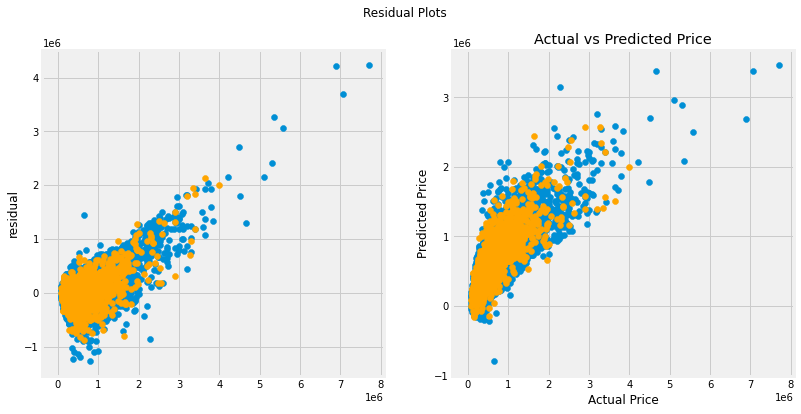

In [124]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Residual Plots')

axes[0].scatter(y_train, y_train-y_hat_train)
axes[0].scatter(y_test, y_test-y_hat_test, color='orange')
axes[0].set(xlabel='', ylabel='residual', title='')
axes[0].hlines(0, xmin=5, xmax=50, colors='red')

axes[1].scatter(y_train, y_hat_train)
axes[1].scatter(y_test, y_hat_test, color='orange')
axes[1].plot([10, 45], [10, 45], color='red', linestyle='-')
axes[1].set(xlabel='Actual Price', ylabel='Predicted Price', title='Actual vs Predicted Price')
fig.show()

# iNTERPRET

Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

# CONCLUSIONS & RECOMMENDATIONS

Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***